In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

In [2]:
start_date = datetime.datetime(2014,1,1)
end_date   = datetime.datetime(2019,7,9)
bac_df = pdr.get_data_yahoo('BAC', start='2014-01-01') 


In [3]:
bac_df =round(bac_df,4)
bac_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,15.62,15.51,15.60,15.57,57188900.0,14.3831
2014-01-02,16.16,15.68,15.69,16.10,148709900.0,14.8727
2014-01-03,16.50,16.23,16.27,16.41,129921800.0,15.1591
2014-01-06,16.73,16.56,16.63,16.66,114431300.0,15.3901
2014-01-07,16.79,16.45,16.77,16.50,110605100.0,15.2423


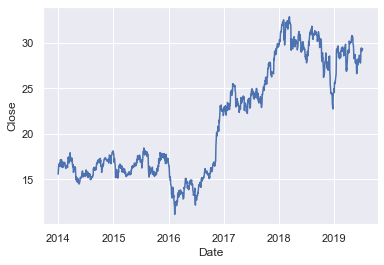

In [4]:
ax =sns.lineplot(x=bac_df.index, y= bac_df.Close )

In [5]:
bac_df.index = pd.DatetimeIndex(bac_df.index)
monthly  = bac_df.resample('BM').last() # BM - Last business date of month
monthly.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,15.62,15.51,15.60,15.57,57188900.0,14.3831
2014-01-31,16.98,16.61,16.72,16.75,139432100.0,15.4732
2014-02-28,16.65,16.35,16.49,16.53,126252100.0,15.2700
2014-03-31,17.27,17.12,17.15,17.20,62115800.0,15.8984
2014-04-30,15.27,15.13,15.26,15.14,82359700.0,13.9943


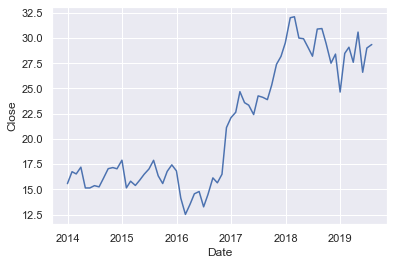

In [6]:
ax =sns.lineplot(x=monthly.index, y= monthly.Close )

In [7]:
bac_df['Change'] = bac_df['Close'] - bac_df['Close'].shift()

In [8]:
bac_df.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2013-12-31,15.62,15.51,15.60,15.57,57188900.0,14.3831,NaN
2014-01-02,16.16,15.68,15.69,16.10,148709900.0,14.8727,0.53
2014-01-03,16.50,16.23,16.27,16.41,129921800.0,15.1591,0.31
2014-01-06,16.73,16.56,16.63,16.66,114431300.0,15.3901,0.25
2014-01-07,16.79,16.45,16.77,16.50,110605100.0,15.2423,-0.16


In [9]:
bac_df['LN_Change'] = np.log(bac_df['Close']/ bac_df['Close'].shift())
bac_df.head()

,High,Low,Open,Close,Volume,Adj Close,Change,LN_Change
Date,,,,,,,,
2013-12-31,15.62,15.51,15.60,15.57,57188900.0,14.3831,NaN,NaN
2014-01-02,16.16,15.68,15.69,16.10,148709900.0,14.8727,0.53,0.033473
2014-01-03,16.50,16.23,16.27,16.41,129921800.0,15.1591,0.31,0.019072
2014-01-06,16.73,16.56,16.63,16.66,114431300.0,15.3901,0.25,0.015120
2014-01-07,16.79,16.45,16.77,16.50,110605100.0,15.2423,-0.16,-0.009650


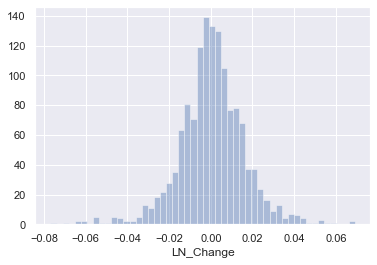

In [10]:
sns.distplot(bac_df['LN_Change'][1:], bins=50, kde=False, rug=False)

####  Average Daily Trading Volume
Calculate average daily trading volume by adding up trading volume over the last X number of days. Then, divide the total by X. For example, sum the last 20 days of trading volume and divide by 20 to get the 20-day ADTV.

In [11]:
bac_df['Daily_Volume'] = bac_df['LN_Change'].rolling(21).std().shift()
bac_df['Expected_Change'] = bac_df['Daily_Volume'] * bac_df['Close']
bac_df.head()

,High,Low,Open,Close,Volume,Adj Close,Change,LN_Change,Daily_Volume,Expected_Change
Date,,,,,,,,,,
2013-12-31,15.62,15.51,15.60,15.57,57188900.0,14.3831,NaN,NaN,NaN,NaN
2014-01-02,16.16,15.68,15.69,16.10,148709900.0,14.8727,0.53,0.033473,NaN,NaN
2014-01-03,16.50,16.23,16.27,16.41,129921800.0,15.1591,0.31,0.019072,NaN,NaN
2014-01-06,16.73,16.56,16.63,16.66,114431300.0,15.3901,0.25,0.015120,NaN,NaN
2014-01-07,16.79,16.45,16.77,16.50,110605100.0,15.2423,-0.16,-0.009650,NaN,NaN


In [12]:
bac_df_exch  = bac_df[bac_df['Expected_Change'].notnull()] 

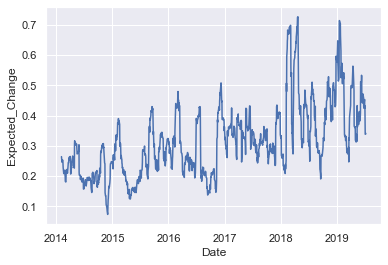

In [13]:
ax =sns.lineplot(x=bac_df_exch.index, y= bac_df_exch.Expected_Change )